In this notebook I apply **logistic regression** to predict
the probability of a flight being delayed. To do that, 
I use real data, loaded from the `dataset_SCL.csv`.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import time
import random

plt.rc("font", size=12)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

cwd = os.getcwd()


def findSeason(date):
    """
    Esta función mapea fechas a valores '0' o '1'
    '1' es temporada alta 
    """
    year = date.year
    date1S1 = pd.Timestamp(str(year) + '-07' + '-15' ).dayofyear
    date2S1 = pd.Timestamp(str(year) + '-07' + '-31').dayofyear
    date1S2 = pd.Timestamp(str(year) + '-09' + '-11' ).dayofyear
    date2S2 = pd.Timestamp(str(year) + '-09' + '-30').dayofyear
    date1S3 = pd.Timestamp(str(year) + '-12' + '-15').dayofyear
    date1S32 = pd.Timestamp(str(year) + '-12' + '-31').dayofyear
    date2S3 = pd.Timestamp(str(year) + '-01' + '-01').dayofyear
    date2S32 = pd.Timestamp(str(year) + '-03' + '-15').dayofyear

    if (date.dayofyear >= date1S1) and (date.dayofyear <= date2S1):
        return 1
    elif (date.dayofyear >= date1S2) and (date.dayofyear <= date2S2):
        return 1
    elif (date.dayofyear >= date1S3) and (date.dayofyear <= date1S32):
        return 1
    elif (date.dayofyear >= date2S3) and (date.dayofyear <= date2S32):
        return 1
    else:
        return 0
    
    
def findPeriodOfTheDay(hora):
    
    """
    Esta función mapea horas a 'periodo_dia'
    'periodo_dia' puede ser 'mañana','tarde' o 'noche'
    """
    t10 = time(5,0)
    t11 = time(11,59)
    t20 = time(12,0)
    t21 = time(18,59)
    t30 = time(19,0)
    t31 = time(0,0)
    t40 = time(0,1)
    t41 = time(4,59)
    
    if hora >= t10 and hora < t20:
        return 'mañana'
    if hora >= t20 and hora < t30:
        return 'tarde'
    if hora >= t30:
        return 'noche'
    if hora < t41:
        return 'noche'

En la siguiente celda cargamos la data

In [2]:
data = pd.read_csv("dataset_SCL.csv", low_memory=False)

#### ¿Cómo está distribuida la data?

Una forma de analizar esto es visualizando la data. Notemos, por ejemplo, que la aerolínea que más vuelos opera es el *Grupo LATAM*. 

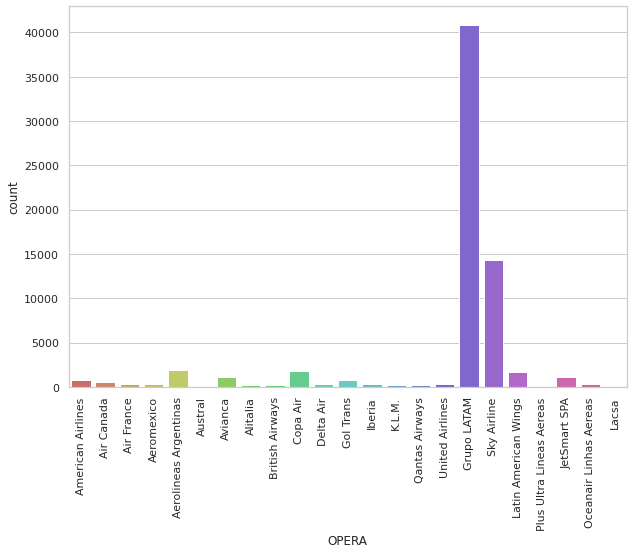

In [3]:
plt.figure(figsize=(10,7))
sns.countplot(x='OPERA', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

También que el destino con mayor cantidad de vuelos es la ciudad de *Buenos Aires* para vuelos internacionales, y la ciudad de *Antofagasta* para vuelos nacionales


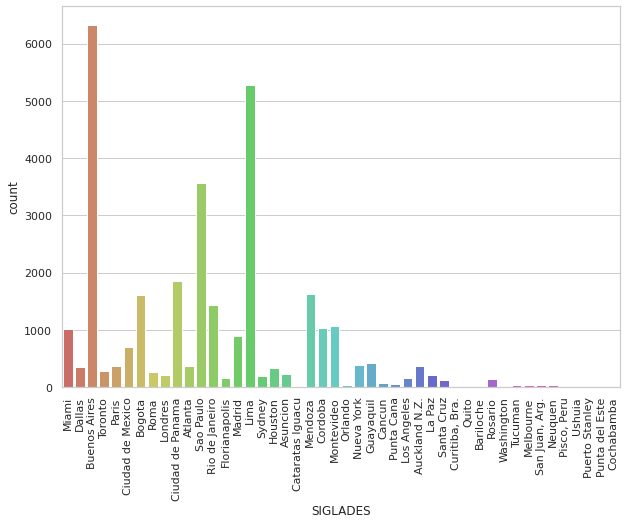

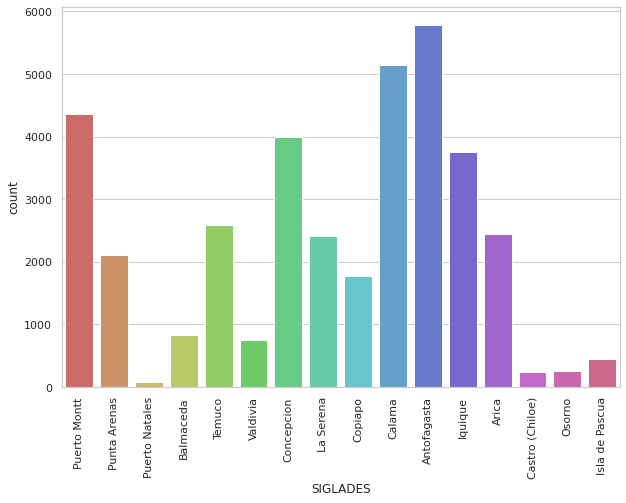

In [4]:
plt.figure(figsize=(10,7))

vuelos_internacionales = data[data['TIPOVUELO']=='I']
sns.countplot(x='SIGLADES', data=vuelos_internacionales, palette='hls')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,7))
vuelos_nacionales = data[data['TIPOVUELO']=='N']
sns.countplot(x='SIGLADES', data=vuelos_nacionales, palette='hls')
plt.xticks(rotation=90)

plt.show()

#### Generar columnas adicionales

In [5]:
# La siguiente línea calcula las diferencias en las horas
deltas = data['Fecha-O'].apply(pd.Timestamp) - data['Fecha-I'].apply(pd.Timestamp) 

data['dif_min'] = deltas.apply(pd.Timedelta.total_seconds)/60
data['atraso_15'] = (data['dif_min'] > 15).astype(int)
data['temporada_alta'] = data['Fecha-I'].apply(pd.Timestamp).apply(findSeason)
data['periodo_dia'] = data['Fecha-I'].apply(pd.Timestamp).apply(pd.Timestamp.time)
data['periodo_dia'] = data['periodo_dia'].apply(findPeriodOfTheDay)

#### Expotar data columnas adicionales

In [6]:
synthetic_features = ['temporada_alta','dif_min','atraso_15','periodo_dia']
data[synthetic_features].to_csv('synthetic_features.csv')

#### Tasa de atrasos por variables

La tasa de atrasos la podemos visualizar. En los siguientos gráficos con barras, la porción en naranja corresponde a la proporción de vuelos con atrasos de más de 15 minutos, en azul vuelos que partieron en un rango entre el horario previsto + 15 min o antes. 

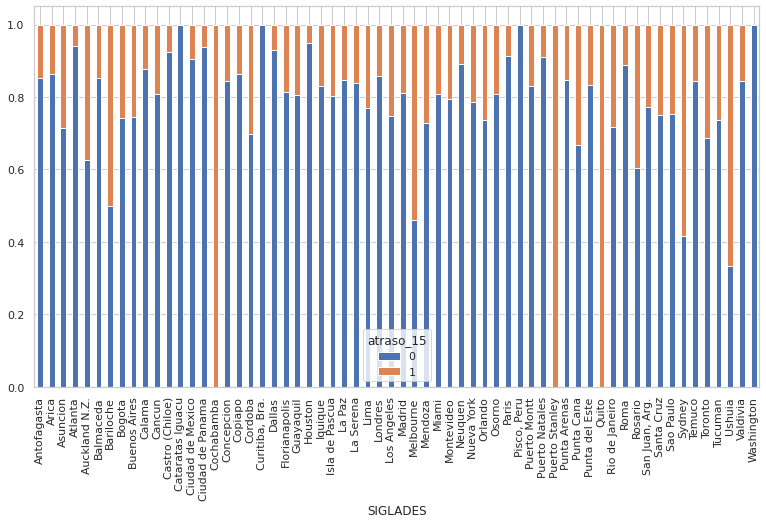

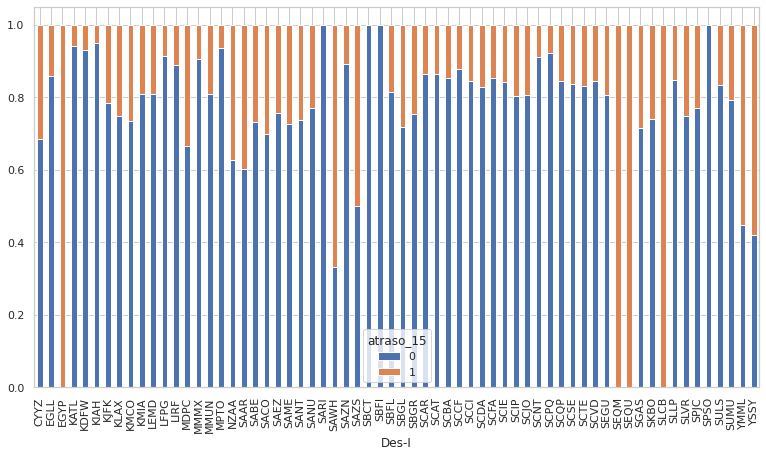

In [7]:
table = pd.crosstab(data['SIGLADES'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar', figsize=(13,7), stacked=True)
plt.show()

table = pd.crosstab(data['Des-I'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar', figsize=(13,7), stacked=True)
plt.show()

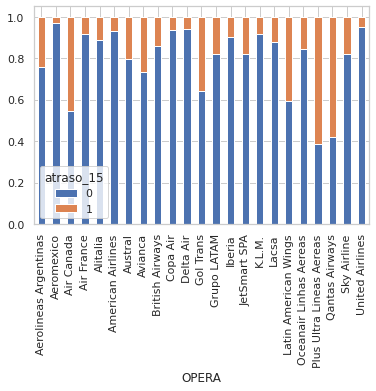

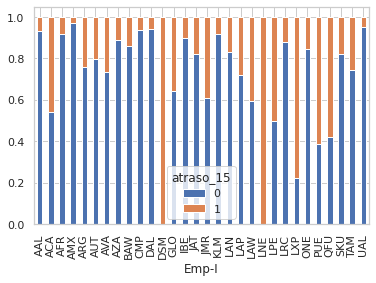

In [8]:
table = pd.crosstab(data['OPERA'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar',stacked=True)
plt.show()


table = pd.crosstab(data['Emp-I'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar',stacked=True)
plt.show()

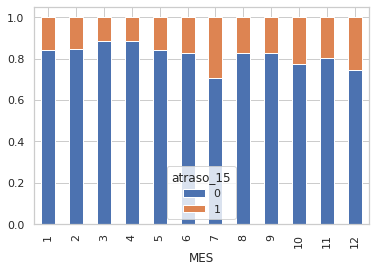

In [9]:
table = pd.crosstab(data['MES'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar',stacked=True)
plt.show()

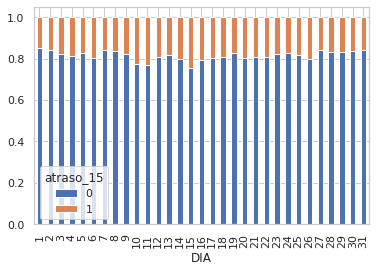

In [10]:
table = pd.crosstab(data['DIA'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar',stacked=True)
plt.show()

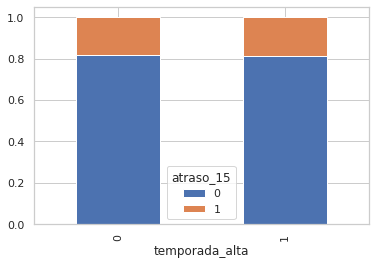

In [11]:
table = pd.crosstab(data['temporada_alta'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar',stacked=True)
plt.show()

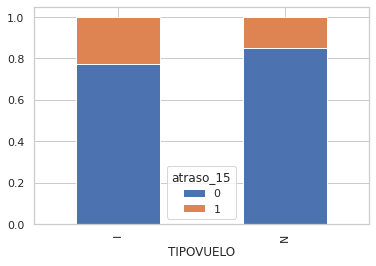

In [12]:
table = pd.crosstab(data['TIPOVUELO'], data['atraso_15'])
table = table.div(table.sum(1).astype(float), axis=0)
table.plot(kind='bar',stacked=True)
plt.show()


Vemos que las variables que más pueden servir como predictores son 'Des-I' 'Emp-I', 'MES', 'DIA', 'TIPOVUELO'

## Dummie variables

Aquí las variables categóricas se transforman a variables numéricas

In [13]:
variables_buenas = ['Des-I','Emp-I','TIPOVUELO']

In [14]:
data_to_keep = data[['MES','DIA', 'atraso_15']]

for var in variables_buenas:
    dummy = pd.get_dummies(data[var])
    data_to_keep = pd.concat([data_to_keep,dummy], axis=1)
    
data_to_keep.head()

,MES,DIA,atraso_15,CYYZ,EGLL,EGYP,KATL,KDFW,KIAH,KJFK,...,LRC,LXP,ONE,PUE,QFU,SKU,TAM,UAL,I,N
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Modelo

Ahora extraemos las variables relevantes y aplicamos un modelo para obtener probabilidades. Regresión logística es un mecanismo muy eficiente para este fín. 

Referencias:
1. https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability?hl=es_419

In [15]:
X = data_to_keep.loc[:,data_to_keep.columns != 'atraso_15']  # data frame con las variables que se 
                                                             #  usarán para entrenar en método
    
Y = data_to_keep['atraso_15'].T                              # variable target

A continuación divimos las data en *training set* y *test set*

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

Ahora entrenamos *LogisticRegression*, de la librería *sklearn*

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

La siguiente tabla compara las predicciones del método con el valor real

In [18]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(10)

,True,Prediction
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


In [19]:
z[(z['Prediction']==0) & (z['True']==0) ]

,True,Prediction
0,0,0
1,0,0
3,0,0
5,0,0
6,0,0
...,...,...
20453,0,0
20454,0,0
20455,0,0
20457,0,0


A continuación muestro de calor para tener idea de la eficacia del método

Text(0.5, 12.5, 'Predicted')

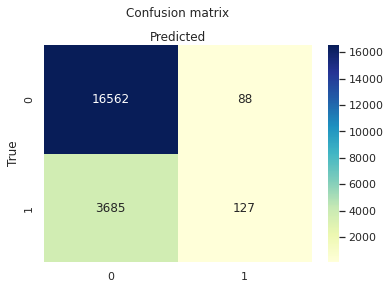

In [20]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

El mapa de calor se puede leer de la siguiente forma:

El recuadro en azul muestra el número de veces (16562 en este caso) que el algoritmo y el valor real coincidieron en el valor `0` (no atraso). Esto es, cuando `z[(z['Prediction']==0) & (z['True']==0)]`

El recuadro en verde muestra  la combinación `z[(z['Prediction']==0) & (z['True']==1)]`. Es decir, el número de veces (3685 veces) que no fue capaz de predecir el valor `1` (atraso).

127 (recuadro inferior derecho) corresponde a `z[(z['Prediction']==1) & (z['True']==1) ]` y 88 (recuadro superior derecho) `z[(z['Prediction']==1) & (z['True']==0) ]`


Para obtener una predicción se aplica el método `predict_proba()`. Por ejemplo, escojamos del test set una fila `i` con valores de las variables

In [21]:
i = 44
x = np.c_[X_test.iloc[i,:]].T
model.predict_proba(x)

array([[0.82943842, 0.17056158]])

`0.17056158` corresponde a la probabilidad de que el vuelo con valores en `x` se atrase.

## Conclusiones

Hemos visto que *Logistic Regression* es el método apropiado para la tarea de obtener probabilidades. Sin embargo, la tasa de predicciones de vuelos atrasados por el modelo aquí entrenado es muy baja. Restaría buscar una combinación de las variables originales que aumente el número de predicciones de atrasos. 